In [5]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (2).csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
df=pd.read_csv("train.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


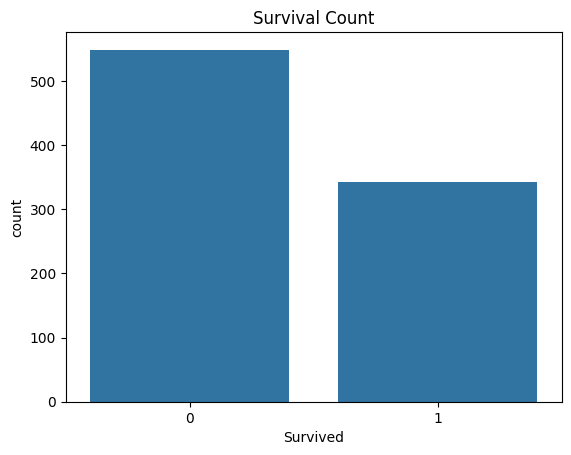

In [11]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex']=df['Sex'].map({'female':0, 'male':1})
df['Embarked']=df['Embarked'].map({'c':0,'Q':1, 'S':2})
df['Age']=np.where(df['Age'] > df['Age'].quantile(0.99), df['Age'].median(), df['Age'])
df['Fare']=np.where(df['Fare'] > df['Fare'].quantile(0.99), df['Fare'].median(), df['Fare'])
df['Deck']=df['Cabin'].str.slice(0,1)
df['Deck']=df['Cabin'].fillna('Unknown')
df['HasCabin']=df['Cabin'].notnull().astype(int)
df['FamilySize']=df['SibSp']+df['Parch']+1
age_bins=[0,12,18,30,50,100]
age_labels=['Child','Teen','Young adult','Adult','Senior']
df['AgeGroup']=pd.cut(df['Age'], bins=age_bins, labels=age_labels)
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

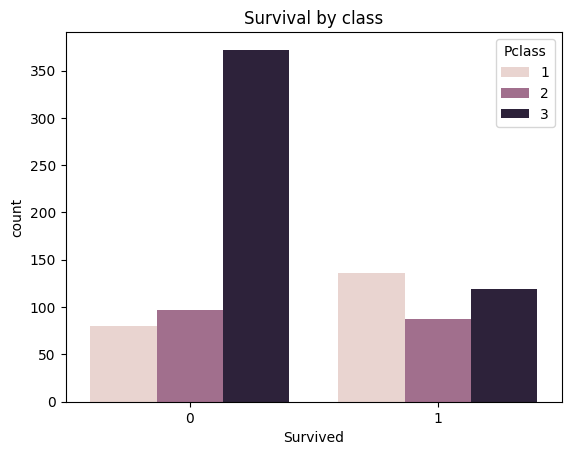

In [12]:
sns.countplot(x='Survived',hue='Pclass', data=df)
plt.title('Survival by class')
plt.show()

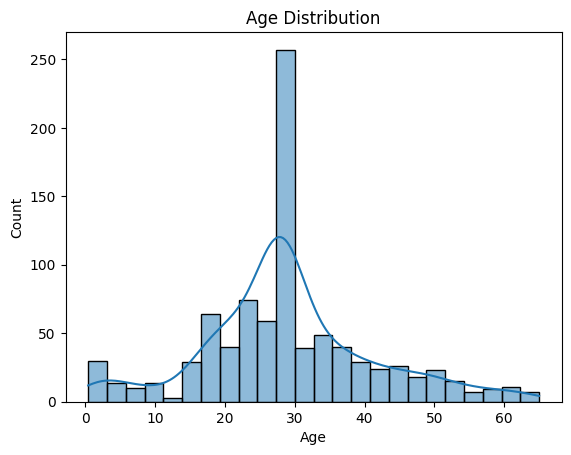

In [13]:
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution')
plt.show()

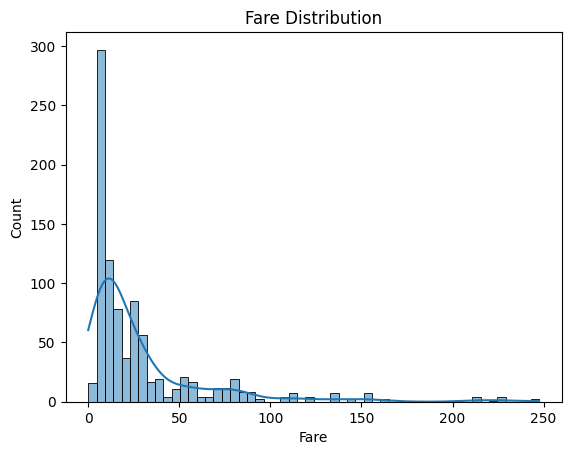

In [14]:
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution')
plt.show()

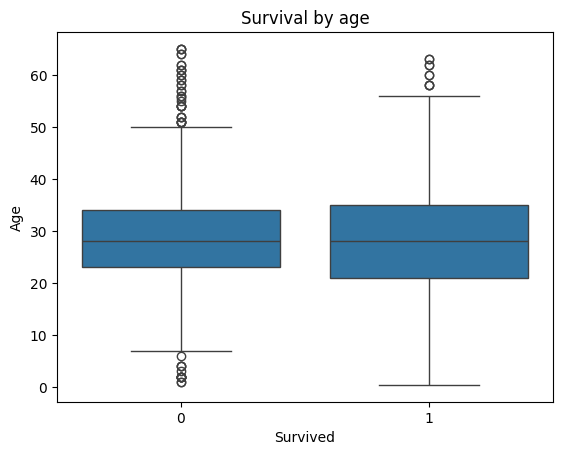

In [15]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Survival by age')
plt.show()

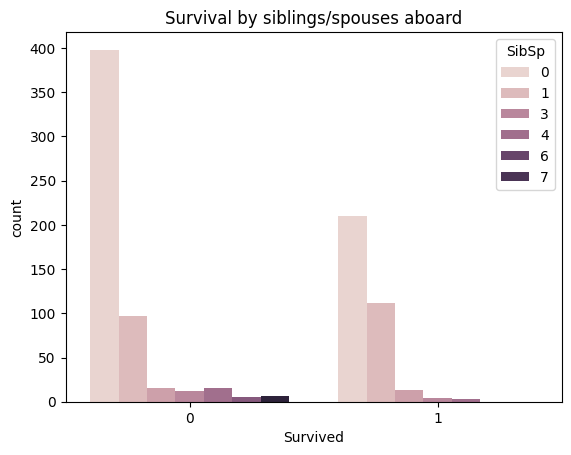

In [16]:
sns.countplot(x='Survived', hue='SibSp', data=df)
plt.title('Survival by siblings/spouses aboard')
plt.show()

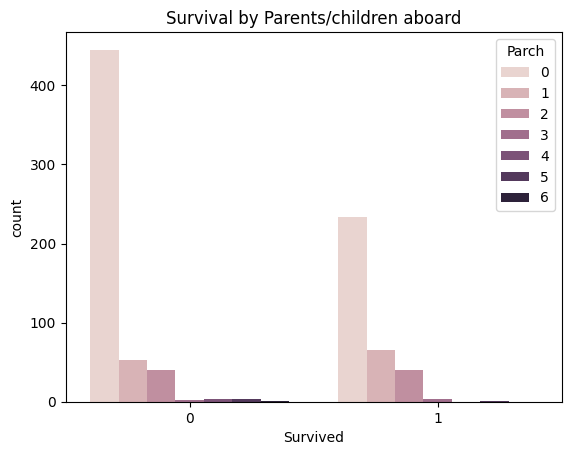

In [17]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parents/children aboard')
plt.show()

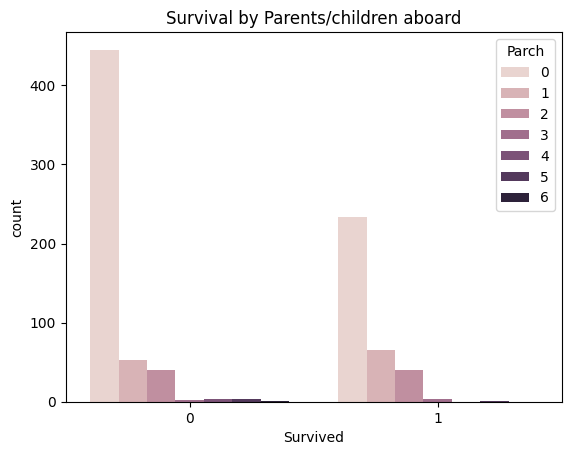

In [18]:
sns.countplot(x='Survived', hue='Parch', data=df)
plt.title('Survival by Parents/children aboard')
plt.show()

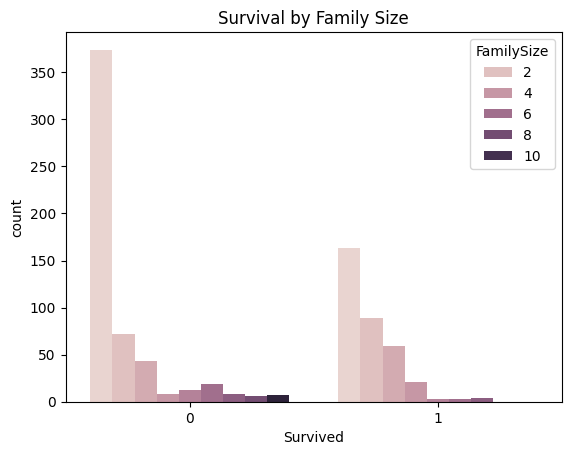

In [19]:
sns.countplot(x='Survived', hue='FamilySize', data=df)
plt.title('Survival by Family Size')
plt.show()

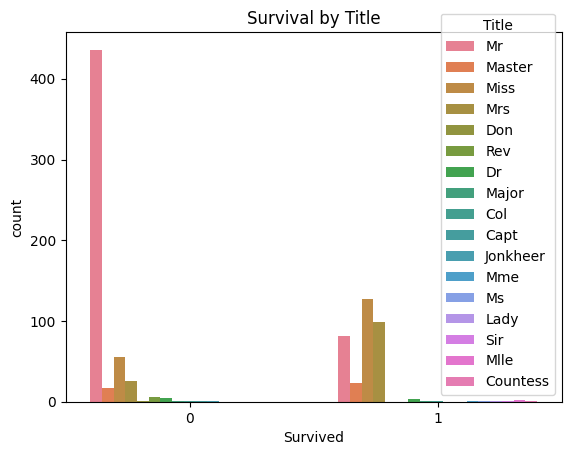

In [20]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
sns.countplot(x='Survived',hue='Title', data=df)
plt.title('Survival by Title')
plt.show()

In [21]:
survival_rate=df.groupby(['Pclass','Sex'])['Survived'].mean().reset_index()


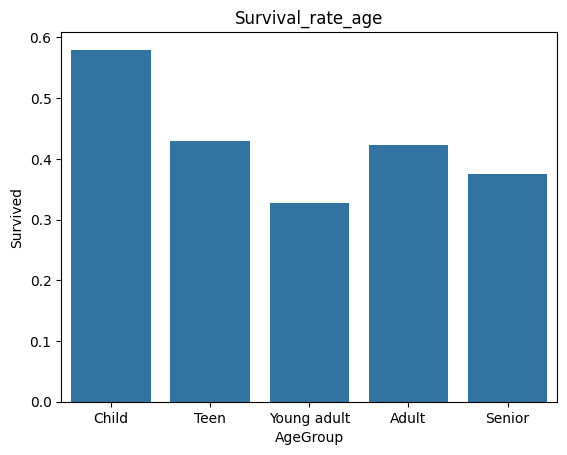

In [22]:
survival_rate_age=df.groupby('AgeGroup')['Survived'].mean().reset_index()
sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_age)
plt.title('Survival_rate_age')
plt.show()

<ipython-input-23-86bc5450b2ff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


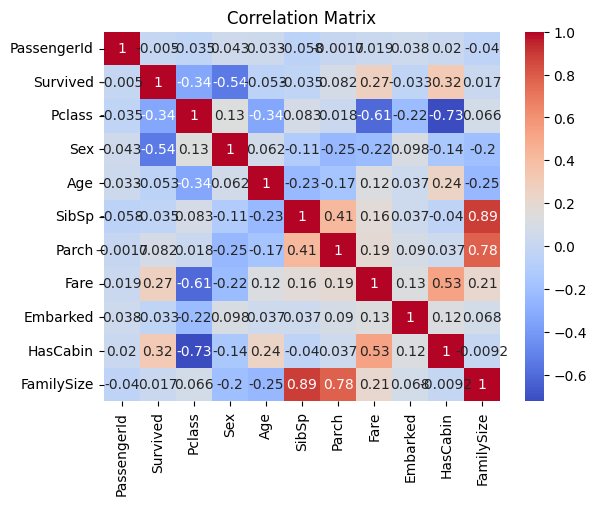

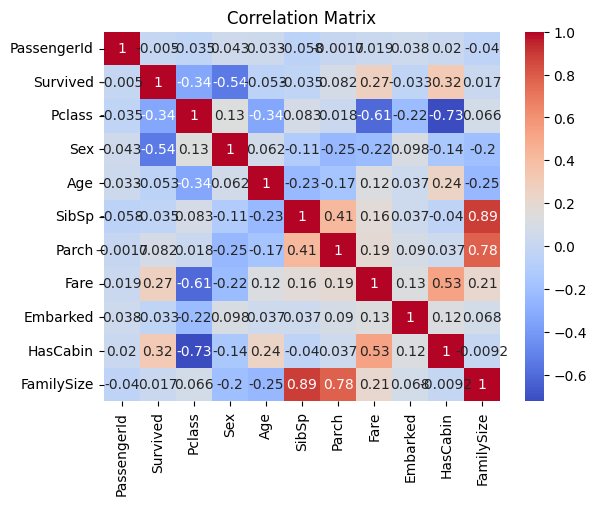

In [23]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()